# Build a simple [or] logical gate as a function, parameterized by (a ,b)

In [29]:
import numpy as np

In [30]:
dataset = np.array([
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])

X = dataset[:, :2]
Y = dataset[:, -1:]

In [31]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [32]:
Y

array([[0],
       [1],
       [1],
       [1]])

# Linear Combination

![gate-neuron.png](gate-neuron.png)

In [34]:
# y = a X1 + b X2 + c

# y = m x + b y = params["a"] * X1_ + params["b"] * X2_ + params["c"]


In [35]:
hyper_param = {
    "LR": 0.01
}

params = {
    "a": 0.1, "b": 0.1, "c": 0.2
}

def predict(X1_ , X2_):
    y = params["a"] * X1_ + params["b"] * X2_ + params["c"]
    return y

def mse(y, y_hat):
    return (y - y_hat)**2

In [36]:
# INPUTS , OUTPUTS

metrics = {
    "loss": [],
    "acc":[]
}


for e in range(1000):
    
    if e%200 == 0:
        print(f"Every {e} epoch")
    
    for i in range(len(X)):
        x1, x2 = X[i];
        y = Y[i][0]

        # FORWARD PASS
        y_hat = predict(x1, x2)
        loss = mse( y , y_hat )
        
        metrics["loss"].append(loss)

        """
        Compute the gradient with respect to a,b,c
        y = a X1 + b X2 + c
        L = (y - yhat)**2


        Delta_L_a = -2 X1 ( y - (a X1 + b X2 + c))
        Delta_L_b = -2 X2 ( y - (a X1 + b X2 + c))
        Delta_L_c = -2 ( y - (a X1 + b X2 + c))
        """

        Delta_L_a =  (-2 * x1) * ( y - (( params.get("a") * x1) + ( params.get("b") * x2) + params.get("c")))
        Delta_L_b =  (-2 * x2) * ( y - (( params.get("a") * x1) + ( params.get("b") * x2) + params.get("c")))
        Delta_L_c =  (-2 ) * ( y - (( params.get("a") * x1) + ( params.get("b") * x2) + params.get("c")))


        # UPDATE Params
        params["a"] = params["a"] - hyper_param['LR'] *(Delta_L_a)
        params["b"] = params["b"] - hyper_param['LR'] * (Delta_L_b)
        params["c"] = params["c"] - hyper_param['LR'] *(Delta_L_c)

Every 0 epoch
Every 200 epoch
Every 400 epoch
Every 600 epoch
Every 800 epoch


In [37]:
params

{'a': 0.48979531937980286, 'b': 0.4948973540615702, 'c': 0.2551027727443367}

In [38]:
for i in range(len(X)):
    x1, x2 = X[i];
    y = Y[i][0]

    # FORWARD PASS
    y_hat = predict(x1, x2)
    loss = mse( y , y_hat )
    print(f"Loss = {loss}, y = {y} , y_hat= {y_hat}")

Loss = 0.06507742466184868, y = 0 , y_hat= 0.2551027727443367
Loss = 0.062499936597062634, y = 1 , y_hat= 0.7500001268059069
Loss = 0.06507698340190403, y = 1 , y_hat= 0.7448980921241395
Loss = 0.05750185601140359, y = 1 , y_hat= 1.2397954461857097


In [39]:
import matplotlib.pyplot as plt

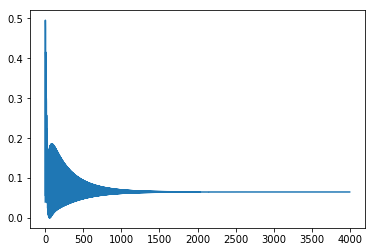

In [40]:
plt.plot(np.arange(len(metrics["loss"])), metrics["loss"] )
plt.show()

# Extending Linear combination with Sigmoid unit
- To push the output values from real number to [ 0 - 1 ]

![gate-neuron-with-sigmoid.png](gate-neuron-with-sigmoid.png)

# Sigmoid Function
![https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png](https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png)

In [41]:
def sig(x):
    """
    Take a real number x in range (-Inf , +Inf)
    And pushes the values to (0, 1)
    """
    
    return 1 / (1  + np.exp(-x))

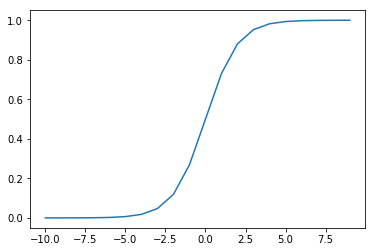

In [42]:
testx = np.arange(-10, 10)
testy = sig(testx)

#plot the graph
plt.plot(testx,  testy)
plt.show()

# Derivative of sigmoid func

In [10]:
# If you derive the math
# sigmoid(x) * (1 - sigmoid(x))

In [11]:
# y = a X1 + b X2 + c
# z =  sigmoid ( y )

# y = m x + b y = params["a"] * X1_ + params["b"] * X2_ + params["c"]
# z = sigmoid(y)

In [ ]:
"""
Compute the gradient with respect to a,b,c
        z = a X1 + b X2 + c
        y = sig(z)
        L = (y - yhat)**2

Result:
Delta_L_a = -2 X1 ( y - sig(z)) * ( sig(z) * (1- sig(z)) )
Delta_L_b = -2 X2 ( y - sig(z)) * ( sig(z) * (1- sig(z)) )
Delta_L_c = -2 ( y - sig(z)) * ( sig(z) * (1- sig(z)) )
"""

![gradient-proof.jpeg](gradient-proof.jpeg)

## Now

In [43]:
hyper_param = {
    "LR": 0.01
}

params = {
    "a": 0.1, "b": 0.1, "c": 0.2
}

def predict(X1_ , X2_):
    y = params["a"] * X1_ + params["b"] * X2_ + params["c"]
    return y

def mse(y, y_hat):
    return (y - y_hat)**2

In [55]:
# INPUTS , OUTPUTS

metrics = {
    "loss": [],
    "acc":[]
}

for e in range(1000):
    
    if e%200 == 0:
        print(f"Every {e} epoch")
    
    for i in range(len(X)):
        x1, x2 = X[i];
        y = Y[i][0]

        # FORWARD PASS
        z = predict(x1, x2)
        y_hat = sig(z)
        loss = mse( y , y_hat )
        
        metrics["loss"].append(loss)

        """
        Compute the gradient with respect to a,b,c
        z = a X1 + b X2 + c
        y = sig(z)
        L = (y - yhat)**2


        Delta_L_a = -2 X1 ( y - sig(z)) * ( sig(z) * (1- sig(z)) )
        Delta_L_b = -2 X2 ( y - sig(z)) * ( sig(z) * (1- sig(z)) )
        Delta_L_c = -2 ( y - sig(z)) * ( sig(z) * (1- sig(z)) )
        """

        Delta_L_a =  (-2 * x1) * ( y - sig(z)) * ( sig(z) * (1- sig(z)) )
        Delta_L_b =  (-2 * x2) * ( y - sig(z)) * ( sig(z) * (1- sig(z)) )
        Delta_L_c =  (-2 ) * ( y - sig(z)) * ( sig(z) * (1- sig(z)) )


        # UPDATE Params
        params["a"] = params["a"] - hyper_param['LR'] *(Delta_L_a)
        params["b"] = params["b"] - hyper_param['LR'] * (Delta_L_b)
        params["c"] = params["c"] - hyper_param['LR'] *(Delta_L_c)

In [52]:
params

{'a': 7.067691747362967, 'b': 7.06771094286703, 'c': -3.2939169506022594}

In [53]:
for i in range(len(X)):
    x1, x2 = X[i];
    y = Y[i][0]

    # FORWARD PASS
    z = predict(x1, x2)
    y_hat = sig(z)
    loss = mse( y , y_hat )
    print(f"Loss = {loss}, y = {y} , y_hat= {y_hat}")

Loss = 0.001280241619820145, y = 0 , y_hat= 0.03578046422029967
Loss = 0.0005039678504489952, y = 1 , y_hat= 0.977550771718186
Loss = 0.0005039867642897402, y = 1 , y_hat= 0.9775503504639885
Loss = 3.829906192309967e-10, y = 1 , y_hat= 0.9999804298538781


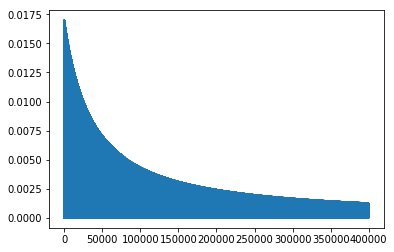

In [54]:
plt.plot(np.arange(len(metrics["loss"])), metrics["loss"] )
plt.show()